In [1]:
import pandas as pd
import geopy.distance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('D:/Project_bigdata/8th jedai_jeju_bus/using_data/train.csv', encoding = 'utf-8')
test_df = pd.read_csv('D:/Project_bigdata/8th jedai_jeju_bus/using_data/test.csv', encoding = 'utf-8')

In [3]:
train_df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
train_df.shape

(415423, 21)

#### 제주 시내 / 시외 카테고리화 하기

In [5]:
train_cat = train_df[:]
test_cat = test_df[:]

In [6]:
coords_jejusi = (33.503830, 126.506739) #제주시의 위도 경도
coords_seoquipo = (33.253487, 126.538840) #서귀포시의 위도 경도

In [7]:
train_cat['dist_jejusi'] = [geopy.distance.vincenty((train_cat['latitude'].iloc[i], train_cat['longitude'].iloc[i]), coords_jejusi).km for i in range(len(train_cat))]
test_cat['dist_jejusi'] = [geopy.distance.vincenty((test_cat['latitude'].iloc[i], test_cat['longitude'].iloc[i]), coords_jejusi).km for i in range(len(test_cat))]

C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.
C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead,

In [8]:
train_cat['dist_seoquipo'] = [geopy.distance.vincenty((train_cat['latitude'].iloc[i], train_cat['longitude'].iloc[i]), coords_seoquipo).km for i in range(len(train_cat))]
test_cat['dist_seoquipo'] = [geopy.distance.vincenty((test_cat['latitude'].iloc[i], test_cat['longitude'].iloc[i]), coords_seoquipo).km for i in range(len(test_cat))]

C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.
C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead,

In [9]:
train_cat.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.568708,26.643712
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.936337,26.042939
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.338600,28.311031
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.871362,11.766300


In [10]:
train_cat.loc[(train_cat['in_out'] == '시내')].loc[train_cat['dist_jejusi'] < 5.5, 'jeju_cat'] = 1
test_cat.loc[(test_cat['in_out'] == '시내')].loc[test_cat['dist_jejusi'] < 5.5, 'jeju_cat'] = 1

C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jinwonchoe\.conda\envs\jin\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
train_cat.loc[(train_cat['in_out'] == '시내')&(train_cat['dist_jejusi'] < 5.5), 'jeju_cat'] = 1
train_cat.loc[(train_cat['in_out'] == '시내')&(train_cat['dist_seoquipo'] < 6), 'jeju_cat'] = 2
train_cat.loc[(train_cat['in_out'] == '시내')&(train_cat['jeju_cat'].isnull()), 'jeju_cat'] = 3
train_cat.loc[(train_cat['in_out'] == '시외'), 'jeju_cat'] = 4

#test set 
test_cat.loc[(test_cat['in_out'] == '시내')&(test_cat['dist_jejusi'] < 5.5), 'jeju_cat'] = 1
test_cat.loc[(test_cat['in_out'] == '시내')&(test_cat['dist_seoquipo'] < 6), 'jeju_cat'] = 2
test_cat.loc[(test_cat['in_out'] == '시내')&(test_cat['jeju_cat'].isnull()), 'jeju_cat'] = 3
test_cat.loc[(test_cat['in_out'] == '시외'), 'jeju_cat'] = 4

카테고리 jeju_cat

1 = in_out 이 시내인 value 중에서 제주시와의 거리가 5.5km 이내인 경우<br>
2 = in_out 이 시내인 value 중에서 서귀포시와의 거리가 6km 이내인 경우<br>
3 = in_out 이 시내인 value 중에서 제주시와의 거리가 5.5km 초과 / 서귀포 거리가 6km 초과 인 경우<br>
4 = in_out 이 시외인 경우<br>

In [12]:
train_cat['jeju_cat'].value_counts()

3.0    204920
1.0    152447
2.0     51133
4.0      6923
Name: jeju_cat, dtype: int64

#### 새로운 카테고리 만들기 - 정류장 별 카테고리

In [13]:
train_cat_add = train_cat[:]
test_cat_add = test_cat[:]
train_cat_add.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo,jeju_cat
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.568708,26.643712,4.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.936337,26.042939,4.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.338600,28.311031,1.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.871362,11.766300,3.0


In [14]:
train_cat_add.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'dist_jejusi', 'dist_seoquipo', 'jeju_cat'],
      dtype='object')

In [15]:
df = pd.pivot_table(data = train_cat_add, index = 'station_name', values = ['7~8_ride', '8~9_ride',
                                                                            '8~9_takeoff', '9~10_takeoff'],aggfunc = 'sum')

#test set
df_test = pd.pivot_table(data = test_cat_add, index = 'station_name', values = ['7~8_ride', '8~9_ride',
                                                                            '8~9_takeoff', '9~10_takeoff'],aggfunc = 'sum')

In [16]:
df.describe()

,7~8_ride,8~9_ride,8~9_takeoff,9~10_takeoff
count,1961.000000,1961.000000,1961.000000,1961.000000
mean,175.765426,172.725650,109.412545,91.287608
std,434.355394,450.824227,359.563113,312.762317
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,2.000000
50%,33.000000,28.000000,14.000000,13.000000
75%,132.000000,127.000000,66.000000,53.000000
max,6095.000000,6864.000000,6164.000000,5314.000000


In [17]:
df.loc[(df['8~9_takeoff'] >= 100), 'takeoff_cat'] = 'lot'
df.loc[(df['9~10_takeoff'] >= 100), 'takeoff_cat'] = 'lot'
df.loc[(df['takeoff_cat'].isnull()), 'takeoff_cat'] = 'few'

#test set
df_test.loc[(df_test['8~9_takeoff'] >= 100), 'takeoff_cat'] = 'lot'
df_test.loc[(df_test['9~10_takeoff'] >= 100), 'takeoff_cat'] = 'lot'
df_test.loc[(df_test['takeoff_cat'].isnull()), 'takeoff_cat'] = 'few'

In [18]:
df.head()

,7~8_ride,8~9_ride,8~9_takeoff,9~10_takeoff,takeoff_cat
station_name,,,,,
(구)구판장,10.0,34.0,1.0,0.0,few
(구)중문동주민센터,245.0,315.0,138.0,131.0,lot
(구)중앙파출소,126.0,136.0,412.0,316.0,lot
(구)화산초등학교,26.0,3.0,0.0,0.0,few
1100고지휴게소,2.0,4.0,20.0,7.0,few


In [19]:
df = df.reset_index()
df_takeoff = df[['station_name','takeoff_cat']]
df_takeoff.head()

#test set
df_test = df_test.reset_index()
df_test_takeoff = df_test[['station_name','takeoff_cat']]
df_test_takeoff

,station_name,takeoff_cat
0,(구)구판장,few
1,(구)중문동주민센터,few
2,(구)중앙파출소,lot
3,(구)화산초등학교,few
4,1100고지휴게소,few
5,1100도로입구,few
6,4.3평화공원,few
7,4.3평화공원입구,few
8,6호광장,few
9,911의원,few


takeoff_cat 변수 설명

lot = 내리는 곳의 인원수가 100 명 이상인 정류장의 경우<br>
few = 내리는 곳의 인원수가 100 명 미만의 정류장인 경우<br>

#### 새로운 카테고리 만들기 - 노선별 카테고리

In [20]:
df_route = pd.pivot_table(data = train_cat_add, index = 'bus_route_id', values = ['7~8_ride', '8~9_ride',
                                                                                  '8~9_takeoff', '9~10_takeoff'],aggfunc = 'sum')

# test set
df_test_route = pd.pivot_table(data = test_cat_add, index = 'bus_route_id', values = ['7~8_ride', '8~9_ride',
                                                                                  '8~9_takeoff', '9~10_takeoff'],aggfunc = 'sum')

In [21]:
df_route.head()

,7~8_ride,8~9_ride,8~9_takeoff,9~10_takeoff
bus_route_id,,,,
4270000,943.0,919.0,328.0,414.0
4280000,1104.0,1495.0,608.0,623.0
7990000,57.0,64.0,67.0,37.0
8170000,610.0,458.0,212.0,200.0
8180000,662.0,543.0,333.0,230.0


In [22]:
df_route.describe()

,7~8_ride,8~9_ride,8~9_takeoff,9~10_takeoff
count,613.000000,613.000000,613.000000,613.000000
mean,562.277325,552.553018,350.013051,292.030995
std,920.049831,1014.561771,606.163005,575.659568
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,5.000000,4.000000,0.000000
50%,179.000000,114.000000,89.000000,51.000000
75%,704.000000,630.000000,437.000000,333.000000
max,7432.000000,8177.000000,5022.000000,4845.000000


In [23]:
df_route.loc[df_route['8~9_takeoff'] >= 350, 'route_takeoff'] = 'lot'
df_route.loc[df_route['9~10_takeoff'] >= 300, 'route_takeoff'] = 'lot'
df_route.loc[df_route['route_takeoff'].isnull(), 'route_takeoff'] = 'few'

# test set
df_test_route.loc[df_test_route['8~9_takeoff'] >= 350, 'route_takeoff'] = 'lot'
df_test_route.loc[df_test_route['9~10_takeoff'] >= 300, 'route_takeoff'] = 'lot'
df_test_route.loc[df_test_route['route_takeoff'].isnull(), 'route_takeoff'] = 'few'

In [24]:
df_route = df_route.reset_index()
df_route_01 = df_route[['bus_route_id','route_takeoff']]
df_route_01.head()

df_test_route = df_test_route.reset_index()
df_test_route_01 = df_test_route[['bus_route_id','route_takeoff']]

route_takeoff 변수 설명

lot = 내리는 곳의 인원수가 350 / 300 명 이상인 버스노선의 경우<br>
few = 내리는 곳의 인원수가 350 / 300 명 미만의 버스노선의 경우

#### route_takeoff 변수 / takeoff_cat 변수 합치기

In [25]:
train_cat.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo,jeju_cat
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.568708,26.643712,4.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.936337,26.042939,4.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.338600,28.311031,1.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.871362,11.766300,3.0


In [26]:
df_takeoff.head()

,station_name,takeoff_cat
0,(구)구판장,few
1,(구)중문동주민센터,lot
2,(구)중앙파출소,lot
3,(구)화산초등학교,few
4,1100고지휴게소,few


In [27]:
df_route_01.head()

,bus_route_id,route_takeoff
0,4270000,lot
1,4280000,lot
2,7990000,few
3,8170000,few
4,8180000,few


In [28]:
train_cat_01 = pd.merge(train_cat, df_takeoff)
train_cat_01.head()

test_cat_01 = pd.merge(test_cat, df_test_takeoff)

In [29]:
train_cat_ttl = pd.merge(train_cat_01,df_route_01)
train_cat_ttl.head()

test_cat_ttl = pd.merge(test_cat_01,df_test_route_01)

In [30]:
train_cat_ttl.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo,jeju_cat,takeoff_cat,route_takeoff
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.4899,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0,few,lot
1,11538,2019-09-02,4270000,시외,344,제주썬호텔,33.4899,126.49373,1.0,8.0,...,0.0,0.0,0.0,0.0,1.0,1.961751,26.554735,4.0,few,lot
2,26498,2019-09-03,4270000,시외,344,제주썬호텔,33.4899,126.49373,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0,few,lot
3,41983,2019-09-04,4270000,시외,344,제주썬호텔,33.4899,126.49373,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0,few,lot
4,56722,2019-09-05,4270000,시외,344,제주썬호텔,33.4899,126.49373,2.0,4.0,...,0.0,0.0,0.0,0.0,3.0,1.961751,26.554735,4.0,few,lot


In [31]:
train_cat_ttl.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'dist_jejusi', 'dist_seoquipo', 'jeju_cat', 'takeoff_cat',
       'route_takeoff'],
      dtype='object')

In [32]:

train_ttl = train_cat_ttl[['id', 'date', 'bus_route_id', 'in_out', 'station_code',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 
        '18~20_ride','dist_jejusi', 'dist_seoquipo', 'jeju_cat']][:]
test_ttl = test_cat_ttl[['id', 'date', 'bus_route_id', 'in_out', 'station_code',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 
        'dist_jejusi', 'dist_seoquipo', 'jeju_cat']][:]

In [33]:
train_ttl.head()

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo,jeju_cat
0,0,2019-09-01,4270000,시외,344,33.4899,126.49373,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0
1,11538,2019-09-02,4270000,시외,344,33.4899,126.49373,1.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.961751,26.554735,4.0
2,26498,2019-09-03,4270000,시외,344,33.4899,126.49373,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0
3,41983,2019-09-04,4270000,시외,344,33.4899,126.49373,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961751,26.554735,4.0
4,56722,2019-09-05,4270000,시외,344,33.4899,126.49373,2.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.961751,26.554735,4.0


In [34]:
dfdf = pd.get_dummies(train_cat_ttl[['takeoff_cat',	'route_takeoff']])
dfdf_test = pd.get_dummies(test_cat_ttl[['takeoff_cat',	'route_takeoff']])

In [35]:
bus_ttl = pd.merge(train_ttl,dfdf,how = 'outer', left_index = True, right_index = True)
bus_ttl_test = pd.merge(test_ttl,dfdf_test,how = 'outer', left_index = True, right_index = True)
bus_ttl.head()

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,10~11_takeoff,11~12_takeoff,18~20_ride,dist_jejusi,dist_seoquipo,jeju_cat,takeoff_cat_few,takeoff_cat_lot,route_takeoff_few,route_takeoff_lot
0,0,2019-09-01,4270000,시외,344,33.4899,126.49373,0.0,1.0,2.0,...,0.0,0.0,0.0,1.961751,26.554735,4.0,1,0,0,1
1,11538,2019-09-02,4270000,시외,344,33.4899,126.49373,1.0,8.0,3.0,...,0.0,0.0,1.0,1.961751,26.554735,4.0,1,0,0,1
2,26498,2019-09-03,4270000,시외,344,33.4899,126.49373,2.0,4.0,2.0,...,0.0,0.0,0.0,1.961751,26.554735,4.0,1,0,0,1
3,41983,2019-09-04,4270000,시외,344,33.4899,126.49373,3.0,3.0,1.0,...,0.0,0.0,0.0,1.961751,26.554735,4.0,1,0,0,1
4,56722,2019-09-05,4270000,시외,344,33.4899,126.49373,2.0,4.0,8.0,...,0.0,0.0,3.0,1.961751,26.554735,4.0,1,0,0,1


In [36]:
bus_ttl['in_out'] = bus_ttl['in_out'].map({'시내' : 0, '시외' : 1})
bus_ttl_test['in_out'] = bus_ttl_test['in_out'].map({'시내' : 0, '시외' : 1})

#### date 변수의 변환

In [37]:
# train set 설정
bus_ttl['date'] = pd.to_datetime(bus_ttl['date'])

bus_ttl['weekday'] = bus_ttl['date'].dt.weekday

In [38]:
# test set 설정
bus_ttl_test['date'] = pd.to_datetime(bus_ttl_test['date'])

bus_ttl_test['weekday'] = bus_ttl_test['date'].dt.weekday

In [39]:
# 원핫 인코딩
bus_ttl = pd.get_dummies(bus_ttl, columns = ['weekday'])
bus_ttl_test = pd.get_dummies(bus_ttl_test, columns = ['weekday'])

In [40]:
bus_ttl.head()

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,takeoff_cat_lot,route_takeoff_few,route_takeoff_lot,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,1,344,33.4899,126.49373,0.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,1
1,11538,2019-09-02,4270000,1,344,33.4899,126.49373,1.0,8.0,3.0,...,0,0,1,1,0,0,0,0,0,0
2,26498,2019-09-03,4270000,1,344,33.4899,126.49373,2.0,4.0,2.0,...,0,0,1,0,1,0,0,0,0,0
3,41983,2019-09-04,4270000,1,344,33.4899,126.49373,3.0,3.0,1.0,...,0,0,1,0,0,1,0,0,0,0
4,56722,2019-09-05,4270000,1,344,33.4899,126.49373,2.0,4.0,8.0,...,0,0,1,0,0,0,1,0,0,0


#### heat map

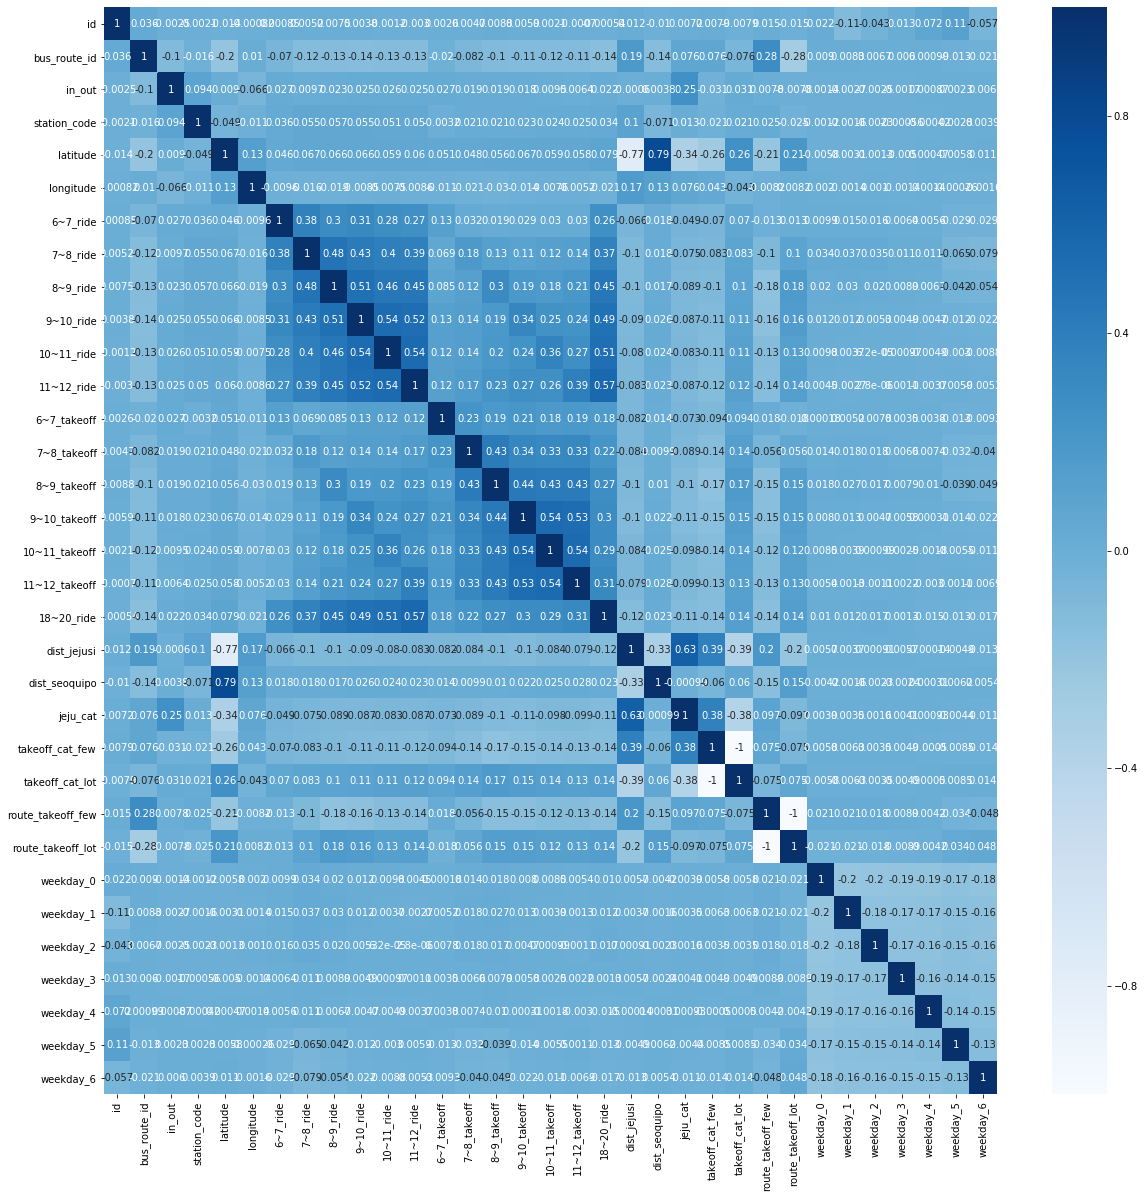

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(bus_ttl.corr(), annot = True, cmap = 'Blues')
plt.show()

#### light gbm 모델링

In [42]:
bus_ttl.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride',
       'dist_jejusi', 'dist_seoquipo', 'jeju_cat', 'takeoff_cat_few',
       'takeoff_cat_lot', 'route_takeoff_few', 'route_takeoff_lot',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [43]:
bus_ttl.head()

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,takeoff_cat_lot,route_takeoff_few,route_takeoff_lot,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,1,344,33.4899,126.49373,0.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,1
1,11538,2019-09-02,4270000,1,344,33.4899,126.49373,1.0,8.0,3.0,...,0,0,1,1,0,0,0,0,0,0
2,26498,2019-09-03,4270000,1,344,33.4899,126.49373,2.0,4.0,2.0,...,0,0,1,0,1,0,0,0,0,0
3,41983,2019-09-04,4270000,1,344,33.4899,126.49373,3.0,3.0,1.0,...,0,0,1,0,0,1,0,0,0,0
4,56722,2019-09-05,4270000,1,344,33.4899,126.49373,2.0,4.0,8.0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
input_var = ['in_out','latitude', 'longitude','6~7_ride', '7~8_ride', '8~9_ride',
             '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
             '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
             'dist_jejusi', 'dist_seoquipo', 'jeju_cat','takeoff_cat_few',
             'takeoff_cat_lot',	'route_takeoff_few', 'route_takeoff_lot']

target = ['18~20_ride']

In [45]:
X_train = bus_ttl[input_var]
y_train = bus_ttl[target]

X_test = bus_ttl_test[input_var]

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

In [47]:
model_lgb = lgb.LGBMRegressor(learning_rate = 0.3,
                              max_depth = 5,
                              objective = 'regression',
                              num_leaves = 10,
                              n_estimators = 1000,
                              max_bin = 60,
                              bagging_fraction = 0.8,
                              bagging_freq = 5,
                              feature_fraction = 0.3,
                              feature_fraction_seed = 10,
                              bagging_seed = 10,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

In [48]:
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=10,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.3, feature_fraction_seed=10,
              importance_type='split', learning_rate=0.3, max_bin=60,
              max_depth=5, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=1000, n_jobs=-1,
              num_leaves=10, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [49]:
bus_ttl_test['18~20_ride'] = model_lgb.predict(X_test)

In [50]:
bus_ttl_test[['id','18~20_ride']].to_csv("D:/Project_bigdata/8th jedai_jeju_bus/submission.csv",index=False)